<a href="https://colab.research.google.com/github/rachotta3227/python/blob/main/%E6%9C%80%E7%B5%82%E8%AA%B2%E9%A1%8C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
URL='usr/download/topic-news.zip'

In [ ]:
def download(URL):
    zip_file = re.split(r'/', URL)[-1] #➀
    urllib.request.urlretrieve(URL, zip_file) #➁
    dir = os.path.splitext(zip_file)[0] #➂

    with zipfile.ZipFile(zip_file) as zip_object: #➃
        zip_object.extractall(dir) #➄

    os.remove(zip_file) #➅

    path = os.path.join(dir,'*.txt') #➆
    list = glob.glob(path) #➇
    return list[0] #➈

最初に実行!

In [ ]:
#Google Colabの場合,
!pip install mecab-python3 unidic-lite
#でMeCabをインストールする。
!pip install japanize_matplotlib
!apt-get -y install fonts-ipafont-gothic
!apt-get install  mecab libmecab-dev mecab-ipadic mecab-ipadic-utf8
!pip install mecab-python3

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-ipafont-gothic is already the newest version (00303-21ubuntu1).
0 upgraded, 0 newly installed, 0 to remove and 15 not upgraded.
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
libmecab-dev is already the newest version (0.996-14build9).
mecab-ipadic is already the newest version (2.7.0-20070801+main-3).
mecab-ipadic-utf8 is already the newest version (2.7.0-20070801+main-3).
mecab is already the newest version (0.996-14build9).
0 upgraded, 0 newly installed, 0 to remove and 15 not upgraded.


悩ましい 大きく ない ない 良い ない 良い ない 欲しい  疎い 高い  ない なく ない ない いい 細かい  安く 良い なけれ いい ありがたい 安く 難しい ない 高い 高い 安い いい ない 安く なさ きつい きつい 良い 長く いい いい 安く 安く 高い ない   ない ない なきゃ ない 安く ない 高い 良い ない いい  悪く いい 手厚い 良い ない 多 安く 高い せこい 高く 物凄く 安く いい 安く いい 情けない 高く ない 安く 高い 高い 安く いい いい   ない おかしい おかしい 安く  いい   ない   欲しい ない ない  悪く 多 無い よい ない 良く ない  ない 多 無い よい 安く すごく おかしい     ない 多 ない ない ない 難しい ない いい よい 寂しい ない 良い なく ない 有り難い 大きい 安い 多  ありがたい 甚だしい 安く いい いい 安い 高い 多い ない 多く 欲しい 欲しい  ない ない 偉い          無い 早く   良く  いい    なく 早く 欲しい 多い  いい ほしい 美味しい  セコい  なく 愚かしい なく 欲しい 新しい いい 安く 良い 良い なさ 良い ない  安く 恐ろしく ダサい ない  セコイ いい    ほしい  良い いい  セコい     すごい   ない せこい 潔 ない 弱い ない ねー セコ ない ない  欲しい 多い ない 欲しい 多い ない ない なかっ いい 安く 欲しく ない  いい ない   ない なく  ない   いい いい  難しく 無い 安い 安い よけれ 良い ない いい 欲しい ない 狭 安い ない ほしい ほしい 安く 安く 高い いい  欲しい  いい セコイ いい  良さ なく ない ありがたい 欲しい 欲しい 嬉しい 情けない 安い 情けない 珍しい ない  えげつない いい いい   安い なく いい ない 安く 難しい すげえ なく 安かろう 悪かろう 情けない 安く ない  安い ない  早い     安く 高い 多い   ない いい ない 少なく  よい よい いい いい よく  若い よい ない    安く なく 安い すごい  多い 安い 良けれ ない 安く ない ない 良い 安い 良い

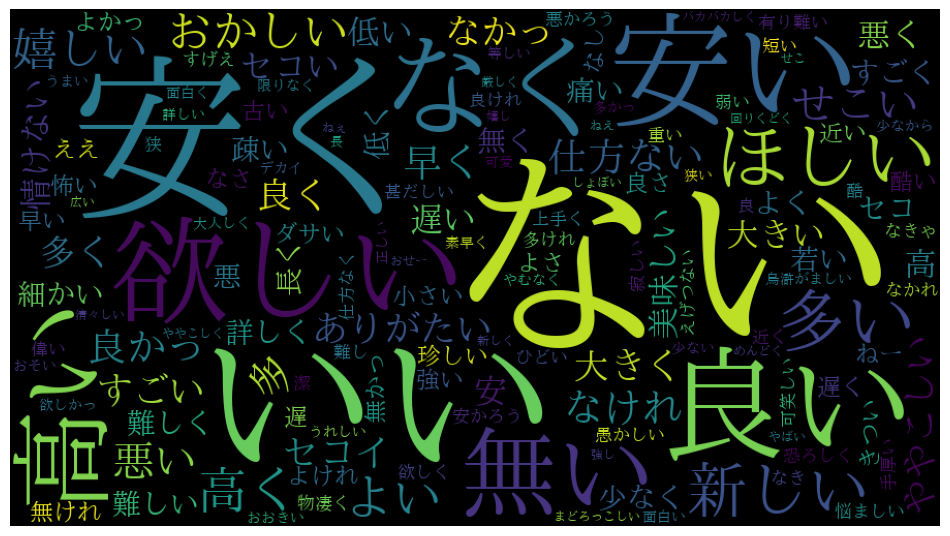

In [ ]:
#Google Colabの場合,
#!pip install mecab-python3 unidic-lite
#でMeCabをインストールする。
#!pip install japanize_matplotlib
#!apt-get -y install fonts-ipafont-gothic
#!apt-get install  mecab libmecab-dev mecab-ipadic mecab-ipadic-utf8
#!pip install mecab-python3

import pandas as pd
import MeCab
import matplotlib.pyplot as plt
import japanize_matplotlib
from wordcloud import WordCloud

#形態素解析を行い、名詞と形容詞に絞り込む。
def mecab_tokenizer(text):
    tokenizer = MeCab.Tagger("Owakati") #形態素解析の準備
    node = tokenizer.parseToNode(text)
    wordList = [] #この中のワードはワードクラウドに表示される
    while node:
        word = node.surface
        wtype = node.feature.split(',')
        if (wtype[0] == "名詞") and (wtype[1] == "一般"):
           wordList.append(word)
        elif wtype[0] == "形容詞":
           wordList.append(word)
        node = node.next
    tokenizedtext = ' '.join(map(str, wordList))
    return tokenizedtext

df = pd.read_csv('YahooNewsComments.csv', header=0, sep=',', index_col=None) #文章を読み込む
text_list = df['comment']
text_list = text_list.dropna(how='any')
text_list = text_list.to_list()
for i in range(len(text_list)):
    text_list[i] = mecab_tokenizer(text_list[i])

keywords = ' '.join(text_list) #名詞&形容詞リストの要素を空白区切りにする
print(keywords)
#ワードクラウドを描画する。フォント選びため、OSの種類により、以下のコメントアウトをしてください。
## Windows OS の場合
#wc = WordCloud(font_path=r"\Windows\Fonts\msmincho.ttc", width=900,height=500)
## Linux OS の場合
wc = WordCloud(font_path=r"/usr/share/fonts/truetype/fonts-japanese-mincho.ttf", width=900,height=500)
## Mac OSの場合
#wc = WordCloud(font_path=r"/System/Library/Fonts/ヒラギノ明朝 ProN.ttc", width=900,height=500)
wc.generate(keywords) ##キーワードを直接利用してワードクラウドを生成する
plt.figure(figsize=(12,8)) #画像サイズを指定する
plt.axis('off') #目盛りを表示しない
plt.imshow(wc) #ワードクラウドを作成する
wc.to_file('wc.png')
plt.show()


In [ ]:
!zip -r /content/folders.zip /content/topic-news.zip

  adding: content/topic-news.zip (stored 0%)


In [ ]:
import os
print(os.path.isdir("drive/MyDrive/topic-news"))
# 実行結果　フォルダならTrue、ファイルならFalse
# > True

True


In [ ]:
pip install glob

In [ ]:
import os

path_dir = "drive/MyDrive/topic-news"
list_file_name =  os.listdir(path_dir)

for i_file_name in list_file_name:
  join_path = os.path.join("tkz",i_file_name)
  print(join_path)


In [ ]:
df = pd.read_table('drive/MyDrive/topic-news/topic-news-5972318.txt', header=0, sep=',', index_col=None) #文章を読み込む
print(df)

In [ ]:
import glob
import pandas as pd
i=0
path="/drive/MyDrive/topic-news"
all_files=glob.glob(path + "/topic-news_*.txt")



In [ ]:
import pandas as pd
import MeCab
import matplotlib.pyplot as plt
import japanize_matplotlib
import glob
from wordcloud import WordCloud

#形態素解析を行い、名詞と形容詞に絞り込む。
def mecab_tokenizer(inFile, outFile):
    tokenizer = MeCab.Tagger("owakati") #形態素解析の準備
    node = tokenizer.parseToNode(inFile)
    wordList = [] #この中のワードはワードクラウドに表示される
    while node:
        word = node.surface
        wtype = node.feature.split(',')
        if (wtype[0] == "名詞") and (wtype[1] == "一般"):
           wordList.append(word)
        elif wtype[0] == "形容詞":
           wordList.append(word)
        node = node.next
    tokenizedtext = ' '.join(map(str, wordList))
    return tokenizedtext
path='/drive/MyDrive/topic-news'
all_files=glob.glob(path + "/topic-news_*.txt")
df = pd.read_table(all_files, header=0, sep=',', index_col=None) #文章を読み込む
import os

path_dir = "drive/MyDrive/topic-news"
list_file_name =  os.listdir(path_dir)

for i_file_name in list_file_name:
  join_path = os.path.join("tkz",i_file_name)
  print(join_path)
 # print(join_path)
#text_list = df[]
#text_list = text_list.dropna(how='any')
#text_list = text_list.to_list()
#for i in range(len(text_list)):
#    text_list[i] = mecab_tokenizer(text_list[i])

keywords = ' '.join(text_list) #名詞&形容詞リストの要素を空白区切りにする
print(keywords)
wc = WordCloud(font_path=r"/usr/share/fonts/truetype/fonts-japanese-mincho.ttf", width=900,height=500)
## Mac OSの場合
wc.generate(keywords) ##キーワードを直接利用してワードクラウドを生成する
plt.figure(figsize=(12,8)) #画像サイズを指定する
plt.axis('off') #目盛りを表示しない
plt.imshow(wc) #ワードクラウドを作成する
wc.to_file('wc.png')
plt.show()


ValueError: ignored

In [ ]:
import MeCab
mecab = MeCab.Tagger()

with open('./'+path+'/topic-news-5903225.txt') as in_file, \
    open('./drive/MyDrive/topic-news/neko.txt.mecab', mode='w') as out_file:
    out_file.write(mecab.parse(in_file.read()))

In [ ]:
import MeCab
mecab = MeCab.Tagger()
files=glob.glob(path + "/topic-news_*.txt")
with open('./' + files) as in_file, \
    open('./neko.txt.mecab', mode='w') as out_file:
    out_file.write(mecab.parse(in_file.read()))

TypeError: ignored

In [ ]:
##############################
## メインプログラム         ##
folder_pathname = "topic-news"

## 形態素解析を行い、結果を「tkz_...」のファイルで同じフォルダに入れる。
filenames = tokenizeAlltxtFiles(folder_pathname)

## テキスト（ = ファイル）をその順でfocumentsリストに入れる
documents = []
for file in glob.glob(folder_pathname+'/tkz_*.txt'):
    documents.extend( line for line in open(file) )

## TF-IDFベクトルを取得
tfidf_vec = build_vectorizer(documents)

## クラスター個数を設定する
###############################################################
## 繰り返し回数(10)とnum_clustersを適用に設定する            ##
###############################################################
elbow(10, tfidf_vec)
num_clusters = 3

## k-means法で、クラスタリングを行う
km_model = KMeans(n_clusters = num_clusters, random_state=0)
km_model.fit(tfidf_vec)

## k-meansクラスタリングの結果を出力する
for index, label in enumerate(km_model.labels_):
   print("{} -> {}".format(filenames[index], label))

## クラスタリングを可視化する
from mpl_toolkits.mplot3d import Axes3D # 3次元でプロット
df = km_model.transform(tfidf_vec)
fig = plt.figure()
ax = Axes3D(fig)
# 分かりやすくクラスタで色分け（クラスタラベル: 0, 1, 2）
color_codes = {0: '#00FF00', 1: '#FF0000', 2: '#0000FF'}
colors = [color_codes[x] for x in km_model.labels_]
ax.scatter(df[:, 0], df[:, 1], df[:, 2], alpha=0.8, color=colors)
plt.show()


NameError: ignored

パーツ

In [ ]:
import MeCab
mecab = MeCab.Tagger()

with open('./'+path+'/topic-news-5903225.txt') as in_file, \
    open('./drive/MyDrive/topic-news/tkz_topic-news-5903225.txt' , mode='w') as out_file:
    out_file.write(mecab.parse(in_file.read()))